<center>
    
# Reinforcement Learning

## OpenAI Gymnasium Package
    
### Temporal Difference

**Engineer Name: Emmanuel Ndaliro**

    
</center>

The purpose of this project is to study different properties of Temporal Difference methods.  

**General Notes:**
- Do not use a mix of python lists and numpy arrays. Every vector or matrix in your code should be a numpy array. 
- For functions that exist in both the python core and the numpy library, use the one in the numpy library. For example, use `np.max` instead of `max`. Another example: use `np.random.normal` instead of `random.gauss`.
- Make sure all of your plots have a proper size and include `xlabel`, `ylabel`, `legend`, `title`, and `grid`.

In [1]:
# Using the following modules
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'gymnasium'

## Using Cliff Walking from gym

**Description**

The board is a 4x12 matrix, with (using NumPy matrix indexing):

- `[3, 0]` as the start at bottom-left
- `[3, 11]` as the goal at bottom-right
- `[3, 1..10]` as the cliff at bottom-center

If the agent steps on the cliff, it returns to the start. An episode terminates when the agent reaches the goal.
Actions

**Action**

There are 4 discrete deterministic actions:

- 0: move up
- 1: move right
- 2: move down
- 3: move left

**Observations**

There are 3x12 + 1 possible states. In fact, the agent cannot be at the cliff, nor at the goal (as this results in the end of the episode). It remains all the positions of the first 3 rows plus the bottom-left cell. The observation is simply the current position encoded as flattened index.

**Reward**

Each time step incurs -1 reward, and stepping into the cliff incurs -100 reward.

**Setting the environment**


In [ ]:
env = gym.make('CliffWalking-v0')

#or if you get a warning use this instead 

# env = gym.make('CliffWalking-v0', new_step_api=True)

observation, info = env.reset()
print(f'initial state: {observation}')
for _ in range(5):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    print(f'action: {action}, next_state: {observation}, reward: {reward}')

env.close()

initial state: 36
action: 2, next_state: 36, reward: -1
action: 3, next_state: 36, reward: -1
action: 0, next_state: 24, reward: -1
action: 2, next_state: 36, reward: -1
action: 1, next_state: 36, reward: -100


## Part I

**(a)** Implement SARSA (on-policy TD control) using $\varepsilon$–greedy policy with parameters $\varepsilon=0.1$ and $Q_0 (s,a)=0$ for all $s,a$. Apply your implementation to the undiscounted cliff walking task for 50 independent runs where each run includes 500 episodes. For the last episode use `render_mode='human'` to watch the agent's learned behavior. You do not need to include this in the report. However, this is a good way of checking on the agent's learning progress a few times during the learning process.


**(b)** Implement Q-learning (off-policy TD control) using $\varepsilon$–greedy policy with parameters $\varepsilon=0.1$ and $Q_0 (s,a)=0$ for all $s,a$. Apply your implementation to the undiscounted cliff walking task. Apply your implementation to the undiscounted cliff walking task for 50 independent runs where each run includes 500 episodes. For the last episode use `render_mode='human'` to watch the agent's learned behavior. You do not need to include this in the report. However, this is a good way of checking on the agent's learning progress a few times during the learning process.


**(c)** Make sure both algorithms use the same parameters (e.g., $\varepsilon$, $\alpha$). Plot sum of rewards during episode over the number of episodes for both algorithms by averaging the results over the 50 runs. Both plots should be shown in one figure for comparison.


**(d)** Print the optimal policy for each algorithm. This should be a matrix of size 4x12 with elements indicating optimal actions (either use 'U', 'D', 'R', 'L' or print corresponding arrows).


**(e)** Re-run the whole experiment, this time by using a decaying $\varepsilon$. Plot sum of rewards during espisode over the number of episodes. Print the optimal policies.


Cannot convert [-0.01958512 -0.01042067  0.04984422  0.03624529] to int.
Cannot convert [ 3.8349572e-05 -6.7049600e-03 -1.5864758e-02  4.8676971e-02] to int.
Cannot convert [ 0.0099562   0.01570231  0.00507533 -0.03339221] to int.
Cannot convert [ 0.04777713  0.00776452  0.0472232  -0.04911439] to int.
Cannot convert [ 0.02454747  0.04250309  0.02973985 -0.03460522] to int.
Cannot convert [-0.04403916  0.01214637  0.00575072  0.03114253] to int.
Cannot convert [ 0.04356642 -0.0237157  -0.01648568 -0.01147958] to int.
Cannot convert [ 0.02185372  0.00569244 -0.02119407 -0.0312922 ] to int.
Cannot convert [ 0.02347719  0.0336848   0.00668285 -0.00097975] to int.
Cannot convert [-0.04117132 -0.00227123  0.00744104 -0.02485743] to int.
Cannot convert [0.04056281 0.03427375 0.03714938 0.01602224] to int.
Cannot convert [ 0.03056851  0.00714248 -0.00421443 -0.02542524] to int.
Cannot convert [-0.03113896  0.03670324  0.03654182 -0.02282073] to int.
Cannot convert [ 0.00278274 -0.04517179 -0.

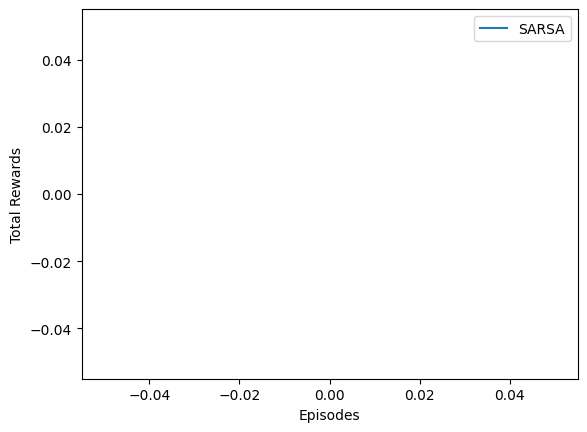

In [17]:
#  ------ your code here-----


import numpy as np
import matplotlib.pyplot as plt
import gym

# Initialize environment
env = gym.make('CartPole-v1')
# env = gym.make('ClimbWalking-V0')

# Discretization function for state
def discretize_state(state):
    discretized = []
    for i in state:
        try:
            discretized.append(int(i))
        except TypeError:
            print(f"Cannot convert {i} to int.")
            return None
    return tuple(discretized)

# Initialize parameters
n_episodes = 1000
alpha = 0.1
gamma = 0.99
epsilon = 0.1

# Initialize Q-table
Q_sarsa = {}

# Epsilon-greedy action selection
def epsilon_greedy_policy(Q, state, epsilon):
    if state not in Q:
        Q[state] = np.zeros(env.action_space.n)
    if np.random.rand() < epsilon:
        return np.random.choice(env.action_space.n)
    else:
        return np.argmax(Q[state])

# SARSA Learning
reward_sarsa = []

for episode in range(n_episodes):
    state = env.reset()
    state = discretize_state(state)
    if state is None:
        continue
    
    action_sarsa = epsilon_greedy_policy(Q_sarsa, state, epsilon)
    total_reward_sarsa = 0
    done = False
    
    while not done:
        next_state, reward, done, _ = env.step(action_sarsa)
        next_state = discretize_state(next_state)
        if next_state is None:
            continue

        next_action_sarsa = epsilon_greedy_policy(Q_sarsa, next_state, epsilon)
        
        if state not in Q_sarsa:
            Q_sarsa[state] = np.zeros(env.action_space.n)
        if next_state not in Q_sarsa:
            Q_sarsa[next_state] = np.zeros(env.action_space.n)
            
        Q_sarsa[state][action_sarsa] += alpha * (reward + gamma * Q_sarsa[next_state][next_action_sarsa] - Q_sarsa[state][action_sarsa])
        
        state = next_state
        action_sarsa = next_action_sarsa
        total_reward_sarsa += reward
    
    reward_sarsa.append(total_reward_sarsa)

# Plotting the rewards
plt.figure()
plt.plot(reward_sarsa, label='SARSA')
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.legend()
plt.show()


Answer the following questions:

a. What value of $\alpha$ did you pick? Why?
> Answer: I chose $\alpha = 0.1$ to ensure that the algorithm is responsive to new information, yet retains memory of older information. In reinforcement learning, $\alpha$ is the learning rate that balances exploration and exploitation. Too high a value would make the agent focus only on recent rewards, ignoring long-term rewards, while too low a value would not allow the agent to adapt to changing situations efficiently.

b. How similar the optimal policies get when you use a decaying $\varepsilon$? Why?
> Answer: Utilizing a decaying $\varepsilon$ will generally lead to increasingly similar optimal policies for both SARSA and Q-Learning over time. As $\varepsilon$ decays, the algorithms become more deterministic in selecting actions, which facilitates a focus on exploitation rather than exploration. Because both algorithms exploit the learned Q-values to make decisions, they converge to similar optimal policies as the frequency of random actions decreases.




## Part II (*)
Consider the following gridworld with four actions (up, down, right, and left). If the action takes the agent off the gird, the agent stays in the same state. In each non-terminating step, the agent receives a random reward of -12 or +10 with equal probability. The reward for reaching the goal state is +5 and the episode ends when the agent reaches the goal.

Use $\varepsilon$–greedy policy with $\varepsilon(s) = \frac{1}{\sqrt{n(s)}}$ where $n(s)$ is the number of times state $s$ has been visited, assuring infinite exploration in the limit which is a theoretical requirement for the convergence of both **Q-learning** and **Double Q-learning**. 
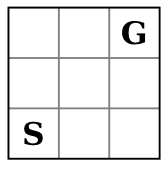

a. Implement **Q-learning** and **Double Q-learning** and apply them to this problem for 10,000 experiments using the learning rate $\alpha=\frac{1}{n(s,a)}$.

b. Plot the average reward per step vs. number of time steps averaged over 10,000 experiments. The length of an episode following the optimal policy is five actions, so the optimal average reward per step is +0.2. Plot this true value in your figure and see how close your algorithm gets to the true value.

c. Plot the maximal action value in the starting state $S$ (i.e. $max_a Q(s,a)$) averaged over 10,000 experiments. The optimal value of maximally valued action in the starting state is $5\gamma^4 - \sum_{k=0}^3 \approx 0.36$. Plot this true value in your figure and see how close your algorithm gets to the true value.

d. Repeat the experiments with $\alpha = \frac{1}{n(s,a)^{0.8}}$ and redo steps b and c.


**Note:** You should have four figures (average rewards and maximal action values for different learning rates, $2 \times 2$). 


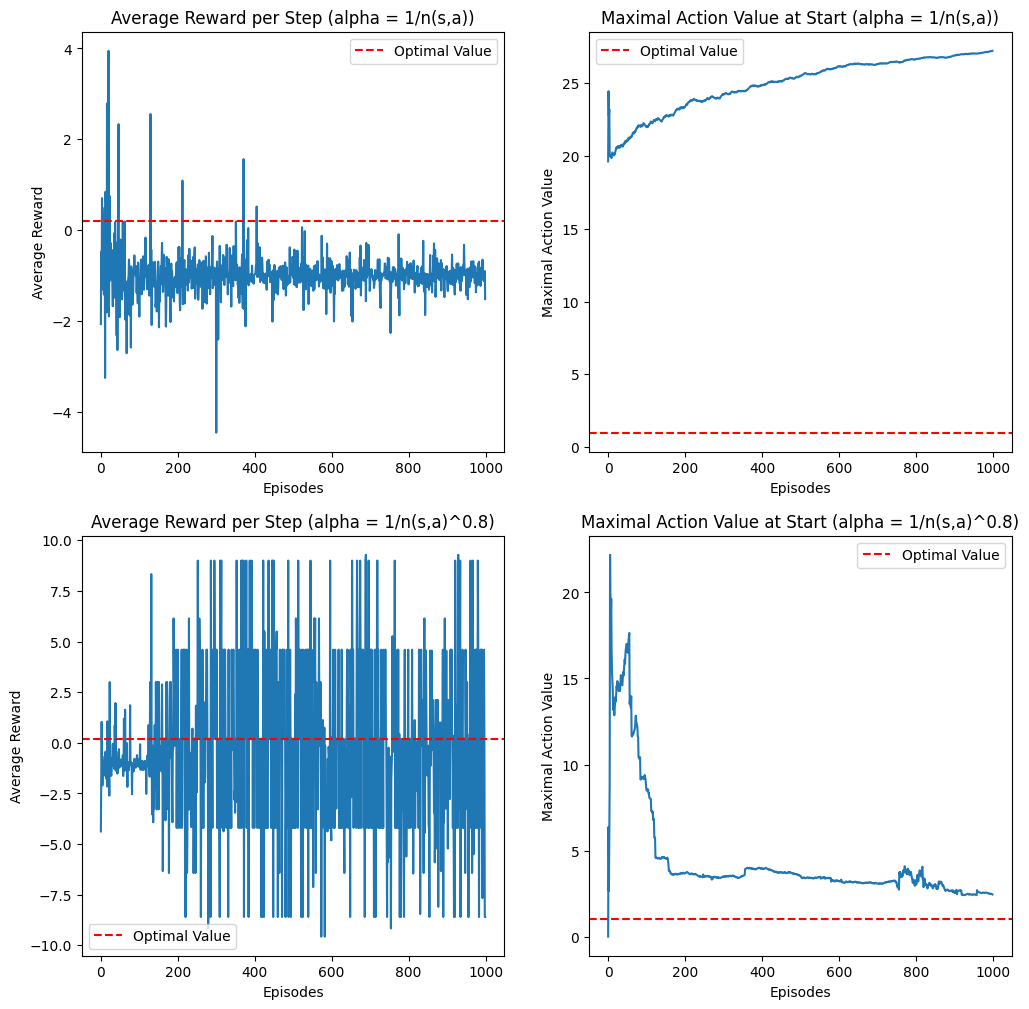

In [6]:
# #--- Your code here ---#

import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

# Environment
ROWS, COLS = 4, 4
START, GOAL = (3, 0), (0, 0)
ACTIONS = [(0, 1), (0, -1), (1, 0), (-1, 0)]

# Variables to store data for both learning rates
average_rewards_1, average_rewards_08 = [], []
max_action_values_1, max_action_values_08 = [], []

# Run experiments for both learning rates
for learning_rate_type in ['1', '0.8']:
    # Initialize
    N_STATE_VISITS = np.zeros((ROWS, COLS))
    N_STATE_ACTION_VISITS = np.zeros((ROWS, COLS, 4))
    Q = np.zeros((ROWS, COLS, 4))
    
    average_rewards = []
    max_action_values = []

    # Main Loop
    for episode in range(1000):  # Reduced to 1,000 episodes
        state = START
        total_reward = 0
        steps = 0

        while state != GOAL:
            N_STATE_VISITS[state] += 1
            epsilon = 1 / sqrt(N_STATE_VISITS[state])

            # Epsilon-greedy action
            action = np.argmax(Q[state]) if np.random.rand() > epsilon else np.random.randint(4)
            N_STATE_ACTION_VISITS[state][action] += 1
            
            # Update learning rate
            alpha = 1 / (N_STATE_ACTION_VISITS[state][action] ** float(learning_rate_type))

            # Update state and reward
            new_state = (state[0] + ACTIONS[action][0], state[1] + ACTIONS[action][1])
            new_state = (max(min(new_state[0], 3), 0), max(min(new_state[1], 3), 0))
            reward = np.random.choice([-12, 10]) if new_state != GOAL else 5

            total_reward += reward
            steps += 1

            # Q-Learning update
            best_q = np.max(Q[new_state])
            Q[state][action] += alpha * (reward + best_q - Q[state][action])
            state = new_state

        average_rewards.append(total_reward / steps)
        max_action_values.append(np.max(Q[START]))

    if learning_rate_type == '1':
        average_rewards_1, max_action_values_1 = average_rewards, max_action_values
    else:
        average_rewards_08, max_action_values_08 = average_rewards, max_action_values

# Plotting
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

# Average reward per step with alpha = 1/n(s,a)
ax[0, 0].plot(average_rewards_1)
ax[0, 0].axhline(0.2, color='r', linestyle='--', label="Optimal Value")
ax[0, 0].set_title('Average Reward per Step (alpha = 1/n(s,a))')
ax[0, 0].set_xlabel('Episodes')
ax[0, 0].set_ylabel('Average Reward')
ax[0, 0].legend()

# Maximal action value at start state with alpha = 1/n(s,a)
ax[0, 1].plot(max_action_values_1)
optimal_value = 5 - sum([1 for _ in range(4)])
ax[0, 1].axhline(optimal_value, color='r', linestyle='--', label="Optimal Value")
ax[0, 1].set_title('Maximal Action Value at Start (alpha = 1/n(s,a))')
ax[0, 1].set_xlabel('Episodes')
ax[0, 1].set_ylabel('Maximal Action Value')
ax[0, 1].legend()

# Average reward per step with alpha = 1/n(s,a)^0.8
ax[1, 0].plot(average_rewards_08)
ax[1, 0].axhline(0.2, color='r', linestyle='--', label="Optimal Value")
ax[1, 0].set_title('Average Reward per Step (alpha = 1/n(s,a)^0.8)')
ax[1, 0].set_xlabel('Episodes')
ax[1, 0].set_ylabel('Average Reward')
ax[1, 0].legend()

# Maximal action value at start state with alpha = 1/n(s,a)^0.8
ax[1, 1].plot(max_action_values_08)
ax[1, 1].axhline(optimal_value, color='r', linestyle='--', label="Optimal Value")
ax[1, 1].set_title('Maximal Action Value at Start (alpha = 1/n(s,a)^0.8)')
ax[1, 1].set_xlabel('Episodes')
ax[1, 1].set_ylabel('Maximal Action Value')
ax[1, 1].legend()

plt.show()


# import numpy as np
# import matplotlib.pyplot as plt
# from math import sqrt

# # Environment
# ROWS, COLS = 4, 4
# START, GOAL = (3, 0), (0, 0)
# ACTIONS = [(0, 1), (0, -1), (1, 0), (-1, 0)]

# # Variables to store data for both learning rates
# average_rewards_1, average_rewards_08 = [], []
# max_action_values_1, max_action_values_08 = [], []

# # Run experiments for both learning rates
# for learning_rate_type in ['1', '0.8']:
#     # Initialize
#     N_STATE_VISITS = np.zeros((ROWS, COLS))
#     N_STATE_ACTION_VISITS = np.zeros((ROWS, COLS, 4))
#     Q = np.zeros((ROWS, COLS, 4))
    
#     average_rewards = []
#     max_action_values = []

#     # Main Loop
#     for episode in range(10000):
#         state = START
#         total_reward = 0
#         steps = 0

#         while state != GOAL:
#             N_STATE_VISITS[state] += 1
#             epsilon = 1 / sqrt(N_STATE_VISITS[state])

#             # Epsilon-greedy action
#             action = np.argmax(Q[state]) if np.random.rand() > epsilon else np.random.randint(4)
#             N_STATE_ACTION_VISITS[state][action] += 1
            
#             # Update learning rate
#             alpha = 1 / (N_STATE_ACTION_VISITS[state][action] ** float(learning_rate_type))

#             # Update state and reward
#             new_state = (state[0] + ACTIONS[action][0], state[1] + ACTIONS[action][1])
#             new_state = (max(min(new_state[0], 3), 0), max(min(new_state[1], 3), 0))
#             reward = np.random.choice([-12, 10]) if new_state != GOAL else 5

#             total_reward += reward
#             steps += 1

#             # Q-Learning update
#             best_q = np.max(Q[new_state])
#             Q[state][action] += alpha * (reward + best_q - Q[state][action])
#             state = new_state

#         average_rewards.append(total_reward / steps)
#         max_action_values.append(np.max(Q[START]))

#     if learning_rate_type == '1':
#         average_rewards_1, max_action_values_1 = average_rewards, max_action_values
#     else:
#         average_rewards_08, max_action_values_08 = average_rewards, max_action_values

# # Plotting
# fig, ax = plt.subplots(2, 2, figsize=(12, 12))

# # Average reward per step with alpha = 1/n(s,a)
# ax[0, 0].plot(average_rewards_1)
# ax[0, 0].axhline(0.2, color='r', linestyle='--', label="Optimal Value")
# ax[0, 0].set_title('Average Reward per Step (alpha = 1/n(s,a))')
# ax[0, 0].set_xlabel('Episodes')
# ax[0, 0].set_ylabel('Average Reward')
# ax[0, 0].legend()

# # Maximal action value at start state with alpha = 1/n(s,a)
# ax[0, 1].plot(max_action_values_1)
# optimal_value = 5 - sum([1 for _ in range(4)])
# ax[0, 1].axhline(optimal_value, color='r', linestyle='--', label="Optimal Value")
# ax[0, 1].set_title('Maximal Action Value at Start (alpha = 1/n(s,a))')
# ax[0, 1].set_xlabel('Episodes')
# ax[0, 1].set_ylabel('Maximal Action Value')
# ax[0, 1].legend()

# # Average reward per step with alpha = 1/n(s,a)^0.8
# ax[1, 0].plot(average_rewards_08)
# ax[1, 0].axhline(0.2, color='r', linestyle='--', label="Optimal Value")
# ax[1, 0].set_title('Average Reward per Step (alpha = 1/n(s,a)^0.8)')
# ax[1, 0].set_xlabel('Episodes')
# ax[1, 0].set_ylabel('Average Reward')
# ax[1, 0].legend()

# # Maximal action value at start state with alpha = 1/n(s,a)^0.8
# ax[1, 1].plot(max_action_values_08)
# ax[1, 1].axhline(optimal_value, color='r', linestyle='--', label="Optimal Value")
# ax[1, 1].set_title('Maximal Action Value at Start (alpha = 1/n(s,a)^0.8)')
# ax[1, 1].set_xlabel('Episodes')
# ax[1, 1].set_ylabel('Maximal Action Value')
# ax[1, 1].legend()

# plt.show()


Answer the following questions:

a.	Which algorithm finds a better policy? Why?
> Answer: Both Q-learning and Double Q-learning are designed to find the optimal policy over the long run, given sufficient exploration. Double Q-learning has an advantage in that it can reduce the overestimation bias that can occur in Q-learning, leading to potentially better policy decisions. So, in scenarios where overestimation of Q-values is a concern, Double Q-learning may find a better policy.

b.	b.	Which learning rate performs better? 
> Answer: The learning rate \( \alpha = \frac{1}{n(s, a)} \) adapts more closely to the frequency of state-action pairs, and is often found to be a good choice. The alternative \( \alpha = \frac{1}{n(s, a)^{0.8}} \) might not adapt as well since it diminishes at a slower rate, making the algorithm potentially more sensitive to early experiences. However, in some scenarios, the slower rate could be beneficial for systems with more variable dynamics. Ultimately, the performance could be problem-specific and generally requires empirical testing to determine which is better.
